# Fig 1a. Comparative performance of deep learning models (CNN, LSTM, dilated CNN, Scaled Enformer) on known ENCODE cell lines and selected TCGA patients.

TODO:
- Remove temporary fake data generation
- Choose TCGA cell lines for CV, add to this comparison

In [1]:
import pandas as pd

df = pd.read_csv('../results.csv', names=['checkpoint', 'model', 'experiment', 'cell_line', 'dataset', 'chrom', 'poisson', 'mean_squared_error', 'spearman_r', 'pearson_r', 'huber'])

df = df[df.experiment == 'fig1']
df = df[df.dataset == 'peaks']
df

,checkpoint,model,experiment,cell_line,dataset,chrom,poisson,mean_squared_error,spearman_r,pearson_r,huber
47,fig1_dCNN_GM12878sp_fold4_20240202-111732,dCNN,fig1,GM12878sp,peaks,8,-446.0706787109375,58292.140625,0.760131,0.714363,85.310066
48,fig1_dCNN_GM12878sp_fold4_20240202-111732,dCNN,fig1,GM12878sp,peaks,18,-356.7817077636719,43303.828125,0.749049,0.733673,71.713547
49,fig1_dCNN_GM12878sp_fold4_20240202-111732,dCNN,fig1,GM12878sp,peaks,4,-387.0240173339844,49777.109375,0.770078,0.757733,74.040588
50,fig1_dCNN_GM12878sp_fold4_20240202-111732,dCNN,fig1,GM12878sp,peaks,5,-449.839599609375,60135.51171875,0.758328,0.747502,84.789963
55,fig1_dCNN_GM12878sp_fold3_20240202-111616,dCNN,fig1,GM12878sp,peaks,9,-475.43524169921875,61596.01953125,0.747238,0.723988,86.366653
...,...,...,...,...,...,...,...,...,...,...,...
181,fig1_dCNN_K562sp_fold2_20240203-050012,dCNN,fig1,K562sp,peaks,3,-365.7616882324219,44083.43359375,0.722465,0.746124,64.241249
182,fig1_dCNN_K562sp_fold2_20240203-050012,dCNN,fig1,K562sp,peaks,12,-392.70556640625,39949.0078125,0.720877,0.748114,66.000366
183,fig1_dCNN_K562sp_fold2_20240203-050012,dCNN,fig1,K562sp,peaks,16,-547.6405639648438,44813.87890625,0.733144,0.782908,75.182777
184,fig1_dCNN_K562sp_fold2_20240203-050012,dCNN,fig1,K562sp,peaks,17,-491.8675842285156,36822.875,0.723965,0.780075,69.620026


In [3]:
# TODO: remove the following code. just making toy data for all models
df = df[df.model == 'dCNN']
dcnn_df = df

# making random diffs compared to dilated CNN here
for model, diff in zip(['CNN', 'LSTM', 'SEnf'], [-0.1, -0.07, 0.03]):
    print(len(df))
    tmp_df = dcnn_df.copy()
    tmp_df.loc[:, ['model']] = model
    tmp_df.loc[:, ['pearson_r']] = tmp_df.pearson_r + diff
    df = pd.concat([df, tmp_df])

# adding the same data for 4 TCGA cell lines
patients = ['TCGA-XX-XXX1', 'TCGA-XX-XXX2', 'TCGA-XX-XXX3', 'TCGA-XX-XXX4']
for pat, copy_cell_line in zip(patients, ['K562sp', 'IMR90sp', 'HepG2sp', 'GM12878sp']):
    new_df = df[df.cell_line == copy_cell_line]
    new_df.loc[:, ['cell_line']] = pat
    df = pd.concat([df, new_df])

df

61
122
183


/var/folders/4b/zsp4fq3d7h3883gjmmpf8f3m0000gn/T/ipykernel_83616/1019260539.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, ['cell_line']] = pat
/var/folders/4b/zsp4fq3d7h3883gjmmpf8f3m0000gn/T/ipykernel_83616/1019260539.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, ['cell_line']] = pat
/var/folders/4b/zsp4fq3d7h3883gjmmpf8f3m0000gn/T/ipykernel_83616/1019260539.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,checkpoint,model,experiment,cell_line,dataset,chrom,poisson,mean_squared_error,spearman_r,pearson_r,huber
47,fig1_dCNN_GM12878sp_fold4_20240202-111732,dCNN,fig1,GM12878sp,peaks,8,-446.0706787109375,58292.140625,0.760131,0.714363,85.310066
48,fig1_dCNN_GM12878sp_fold4_20240202-111732,dCNN,fig1,GM12878sp,peaks,18,-356.7817077636719,43303.828125,0.749049,0.733673,71.713547
49,fig1_dCNN_GM12878sp_fold4_20240202-111732,dCNN,fig1,GM12878sp,peaks,4,-387.0240173339844,49777.109375,0.770078,0.757733,74.040588
50,fig1_dCNN_GM12878sp_fold4_20240202-111732,dCNN,fig1,GM12878sp,peaks,5,-449.839599609375,60135.51171875,0.758328,0.747502,84.789963
55,fig1_dCNN_GM12878sp_fold3_20240202-111616,dCNN,fig1,GM12878sp,peaks,9,-475.43524169921875,61596.01953125,0.747238,0.723988,86.366653
...,...,...,...,...,...,...,...,...,...,...,...
103,fig1_dCNN_GM12878sp_fold1_20240202-111618,SEnf,fig1,TCGA-XX-XXX4,peaks,21,-515.572265625,59033.6640625,0.759241,0.792070,88.756111
109,fig1_dCNN_GM12878sp_fold0_20240202-111458,SEnf,fig1,TCGA-XX-XXX4,peaks,1,-491.1689147949219,76973.0859375,0.758545,0.751458,98.034439
110,fig1_dCNN_GM12878sp_fold0_20240202-111458,SEnf,fig1,TCGA-XX-XXX4,peaks,11,-514.202392578125,80435.4609375,0.750032,0.750310,98.175636
111,fig1_dCNN_GM12878sp_fold0_20240202-111458,SEnf,fig1,TCGA-XX-XXX4,peaks,20,-472.83673095703125,63360.56640625,0.745838,0.755751,90.679848


In [4]:
cv_results = dict()
models = ['CNN', 'LSTM', 'dCNN', 'SEnf']
cell_lines = ['GM12878sp', 'IMR90sp', 'HepG2sp', 'K562sp'] + patients
for model in models:
    cv_results[model] = dict()
    for cell_line in cell_lines:
        # strip sp at end
        cell_line_name = cell_line[:-2] if cell_line[-2:] == 'sp' else cell_line

        cv_results[model][cell_line_name] = df[(df.model == model) & (df.cell_line == cell_line)].pearson_r.tolist()
        # TODO: make sure each combination has exactly 22 chroms, all unique
        print(model, cell_line, len(cv_results[model][cell_line.rstrip('sp')]))
cv_results

CNN GM12878sp 22
CNN IMR90sp 8
CNN HepG2sp 18
CNN K562sp 13
CNN TCGA-XX-XXX1 13
CNN TCGA-XX-XXX2 8
CNN TCGA-XX-XXX3 18
CNN TCGA-XX-XXX4 22
LSTM GM12878sp 22
LSTM IMR90sp 8
LSTM HepG2sp 18
LSTM K562sp 13
LSTM TCGA-XX-XXX1 13
LSTM TCGA-XX-XXX2 8
LSTM TCGA-XX-XXX3 18
LSTM TCGA-XX-XXX4 22
dCNN GM12878sp 22
dCNN IMR90sp 8
dCNN HepG2sp 18
dCNN K562sp 13
dCNN TCGA-XX-XXX1 13
dCNN TCGA-XX-XXX2 8
dCNN TCGA-XX-XXX3 18
dCNN TCGA-XX-XXX4 22
SEnf GM12878sp 22
SEnf IMR90sp 8
SEnf HepG2sp 18
SEnf K562sp 13
SEnf TCGA-XX-XXX1 13
SEnf TCGA-XX-XXX2 8
SEnf TCGA-XX-XXX3 18
SEnf TCGA-XX-XXX4 22


{'CNN': {'GM12878': [0.6143627405166626,
   0.6336729168891907,
   0.6577334046363831,
   0.6475017905235291,
   0.6239880561828614,
   0.6019760012626648,
   0.5504620313644409,
   0.5998026371002197,
   0.6509205341339112,
   0.6122851014137268,
   0.659581983089447,
   0.6518569827079773,
   0.6525323629379273,
   0.6363055944442749,
   0.6291234135627747,
   0.6516516447067261,
   0.6747952342033386,
   0.6620698809623718,
   0.6214584350585938,
   0.620309853553772,
   0.6257511615753174,
   0.6135651707649231],
  'IMR90': [0.7055386543273926,
   0.6984196543693543,
   0.6770382761955261,
   0.6997944951057434,
   0.7073557615280152,
   0.6788318395614624,
   0.6724465727806092,
   0.7113571405410767],
  'HepG2': [0.6323656678199768,
   0.6188079357147217,
   0.5895379424095154,
   0.597370707988739,
   0.6180224657058716,
   0.6105079889297486,
   0.6041934728622437,
   0.6050269842147827,
   0.5943972110748291,
   0.5698701977729798,
   0.5624968647956848,
   0.5029654741287232,

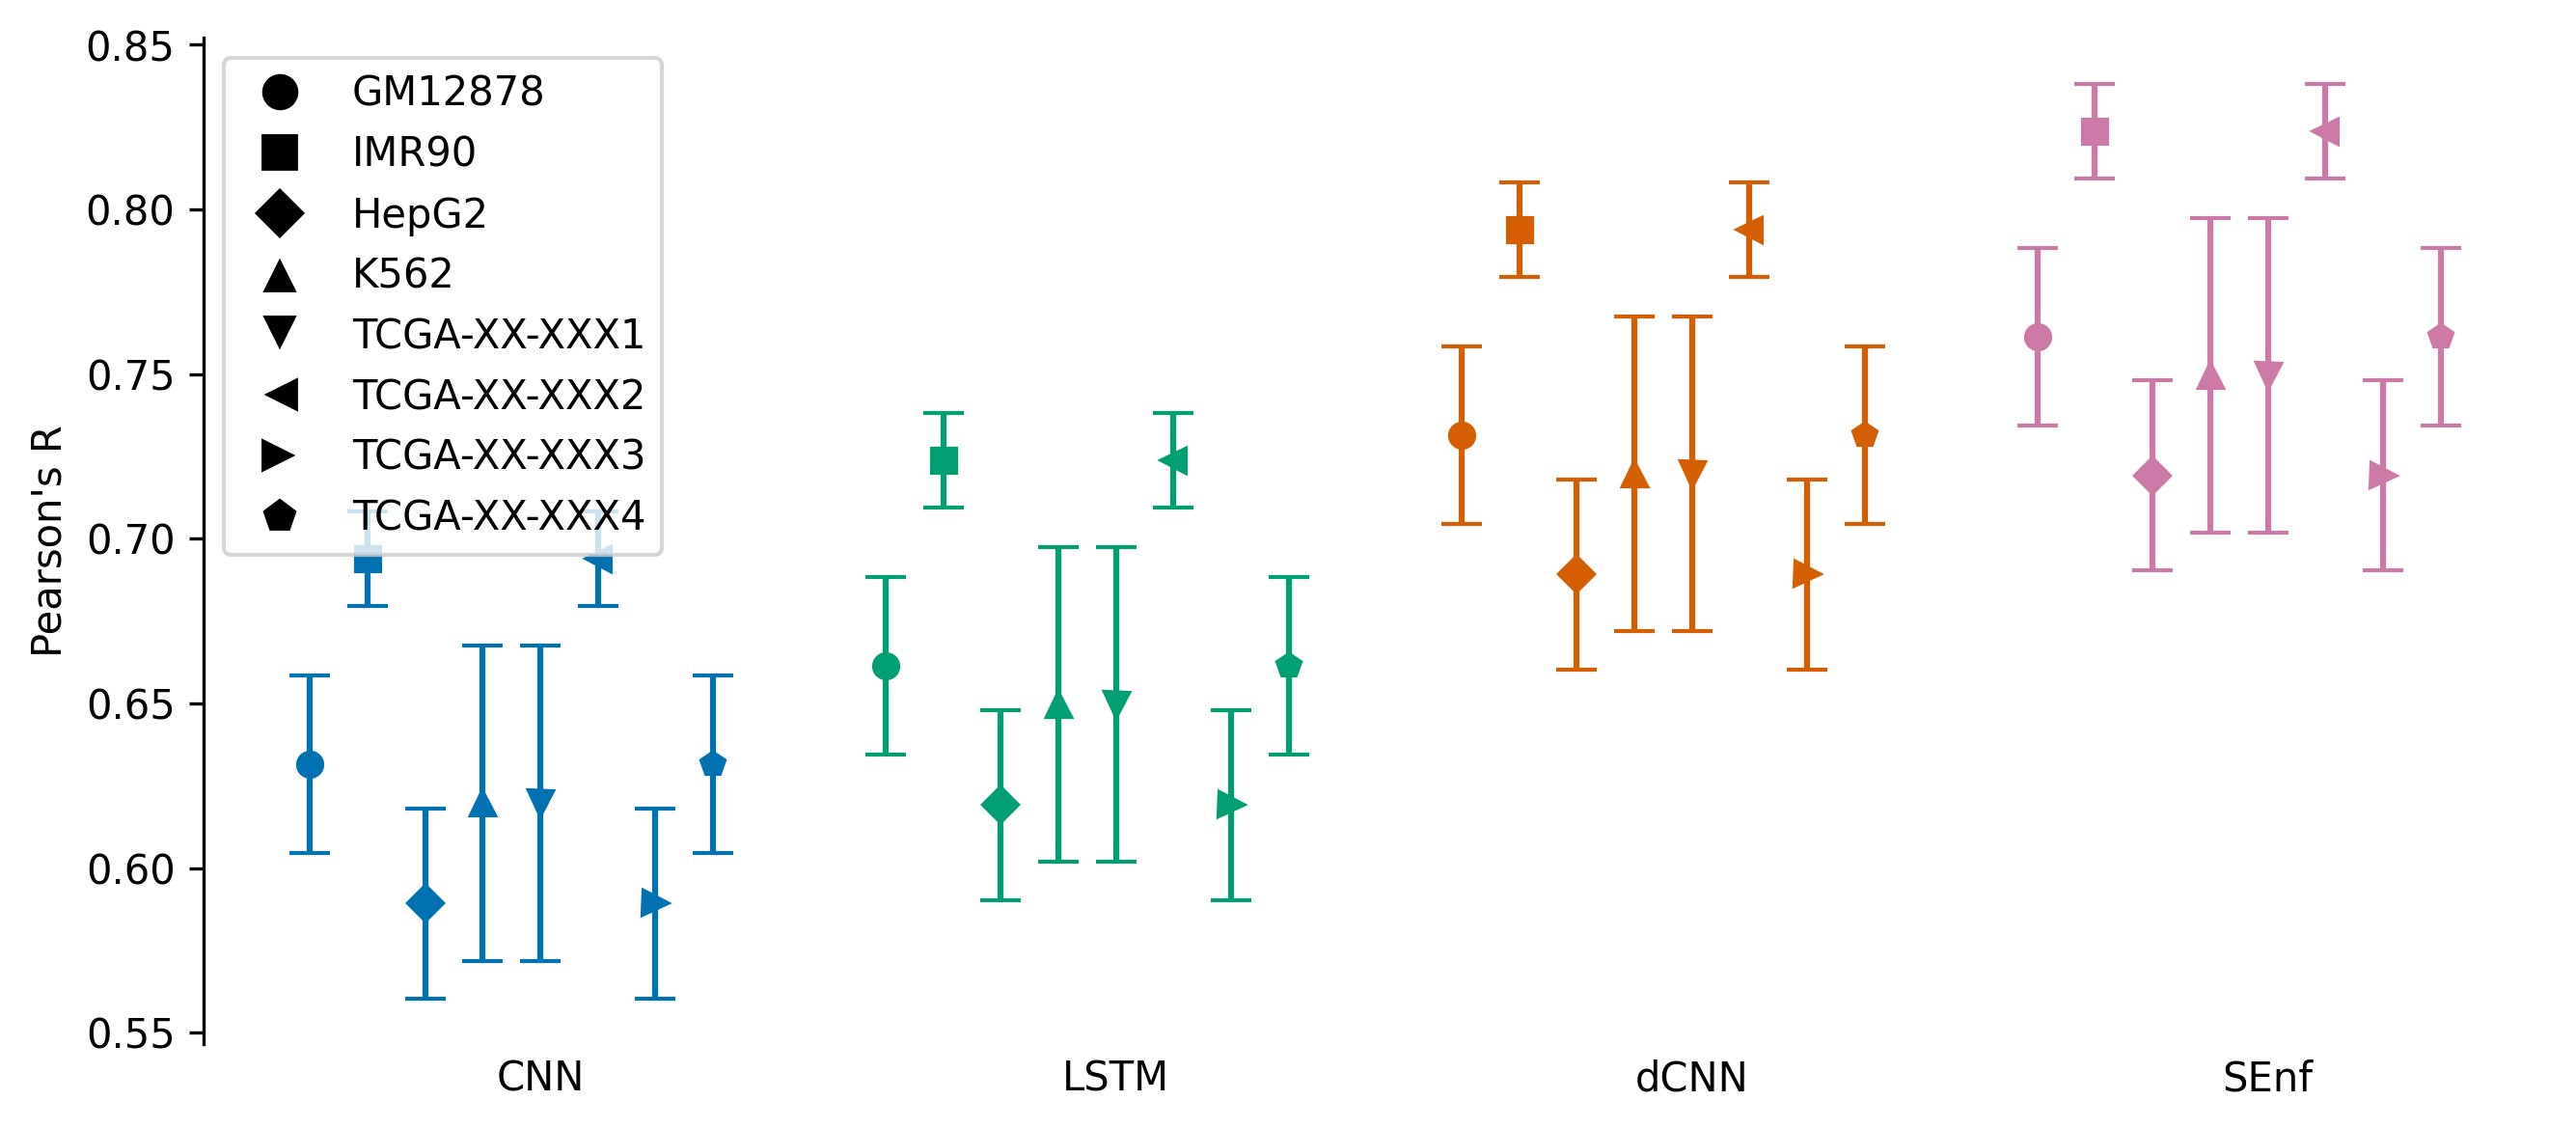

In [10]:
from matplotlib import style
import numpy as np
import matplotlib.pyplot as plt

style.use('seaborn-v0_8-colorblind')


markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p']

# prepare data for plotting

x_labels = []
means = []
errors = []
cell_line_markers = []
colors = []
legend_handles = []


for i, (model, cell_lines) in enumerate(cv_results.items()):
    for j, (cell_line, values) in enumerate(cell_lines.items()):
        mean = np.mean(values)
        std = np.std(values)

        # adjust the x position slightly so they don't overlap
        x_position = i + j * 0.1  # Adjust spacing between cell lines within the same model

        x_labels.append(x_position)
        means.append(mean)
        errors.append(std)
        marker_style = markers[j % len(markers)]
        cell_line_markers.append(marker_style)
        colors.append(f'C{i}')

        # make legend for cell lines
        if i == 0:
            legend_handles.append(plt.Line2D([0], [0], marker=marker_style, color='w', markerfacecolor='k', markersize=10, label=cell_line))

fig, ax = plt.subplots(figsize=(9, 4), dpi=300)
for x, mean, error, marker, color in zip(x_labels, means, errors, cell_line_markers, colors):
    ax.errorbar(x, mean, yerr=error, fmt=marker, c=color, capsize=5)

ax.set_xticks(np.arange(len(cv_results)) + 0.4)
ax.set_xticklabels(cv_results.keys())

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='x', length=0)

ax.set_ylabel("Pearson's R")
plt.legend(handles=legend_handles)
plt.tight_layout()

plt.savefig('fig1a.svg', format='svg')
plt.show()